In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
df =pd.read_csv(r'C:\Users\Meher Boughanmi\Desktop\Meher\CoSIC_1\Machine Learning\iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Numérisation

In [5]:
from sklearn.preprocessing import LabelEncoder
encode =LabelEncoder()
df['species']= encode.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Normalisation

In [6]:
#minMax_normalization
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


In [7]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 18 , 18 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

    corr, 

    cmap = cmap,

    square=True, 

    cbar_kws={ 'shrink' : .9 }, 

    ax=ax, 

    annot = True, 

    annot_kws = { 'fontsize' : 12 }

    )

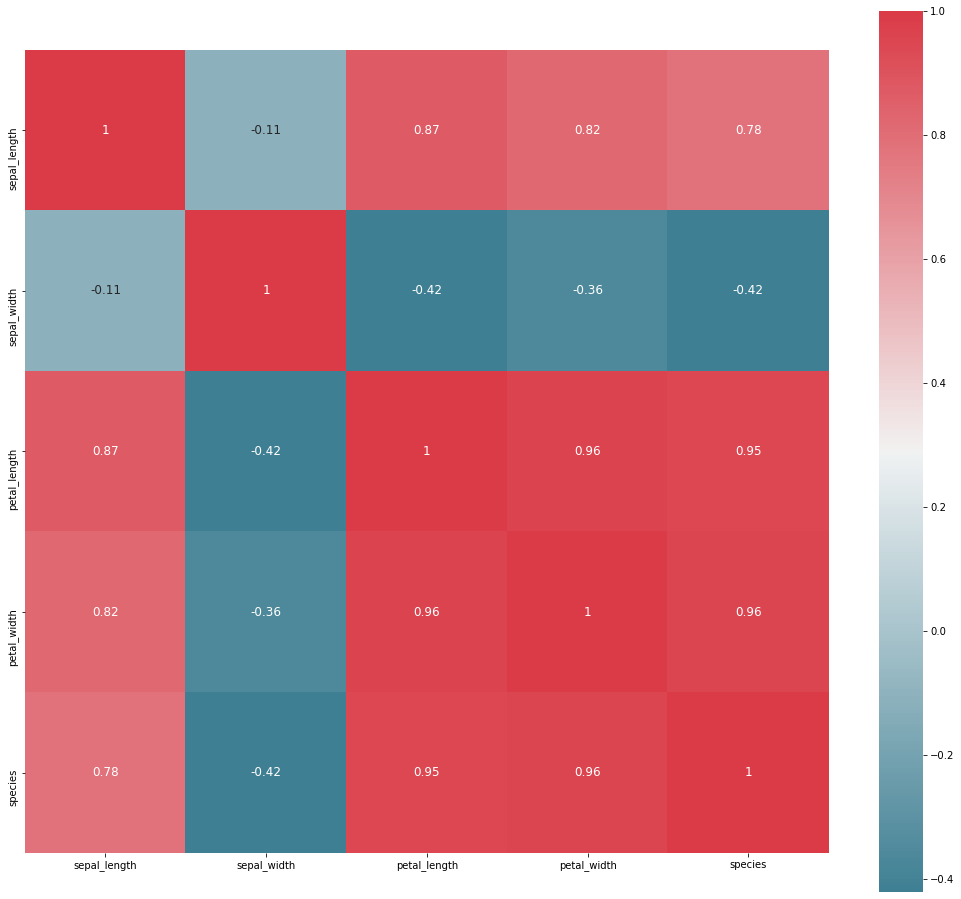

In [8]:
plot_correlation_map(df_norm)

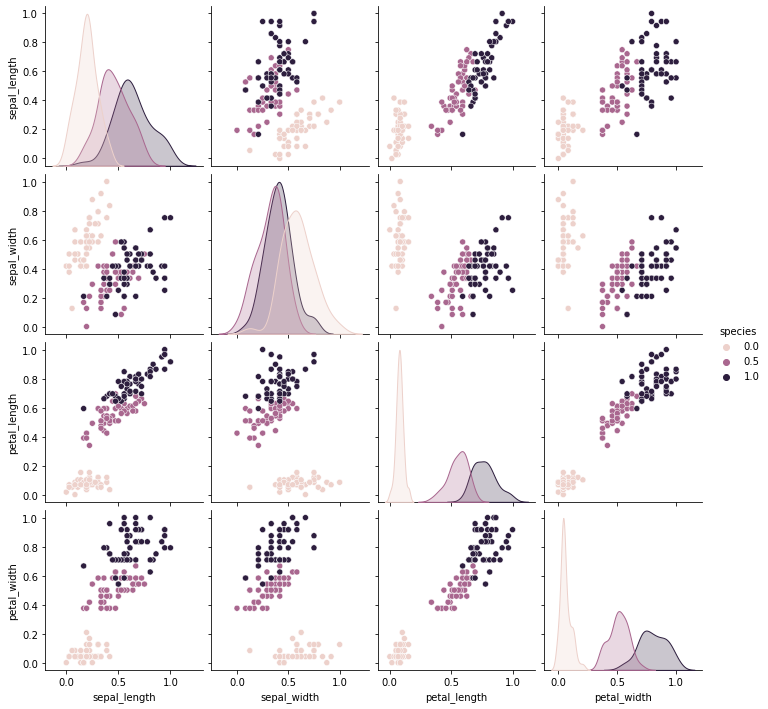

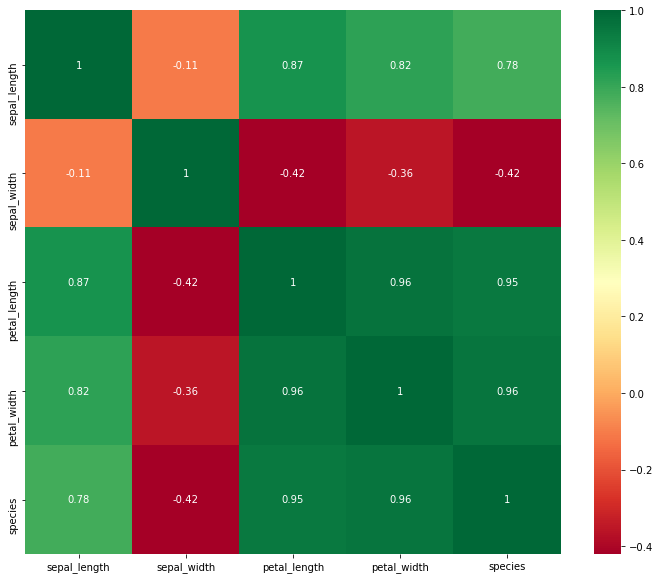

In [9]:
p=sns.pairplot(df_norm, hue='species')
plt.figure(figsize=(12,10))
p=sns.heatmap(df_norm.corr(), annot=True,cmap='RdYlGn')

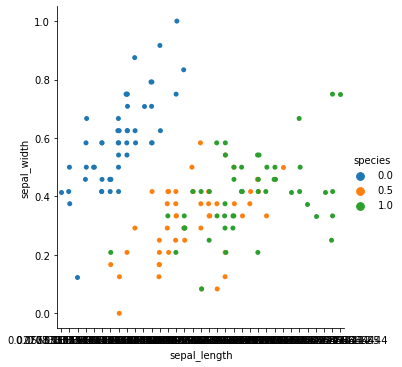

In [10]:
sns.catplot(x ="sepal_length", y='sepal_width', hue ="species", data = df_norm)

In [11]:
#sepal_lengthsepal_width

SyntaxError: invalid syntax (<ipython-input-11-3f73b81b4936>, line 1)

In [12]:
#calculation of z --fonction sigmoide 
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return round(y_head)
b=sigmoid(10)
b

1

In [13]:
X = df.drop(["species"], axis=1)
X_=X.to_numpy()
#X=df_norm['Message']
y=df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=40)

In [14]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
y_pred = LogReg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[16,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 15]], dtype=int64)

In [15]:

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print('RMSE=',rmse)


RMSE= 0.0


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# application_KNN

In [18]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [19]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 100.0 % and k = [1, 3, 5]
